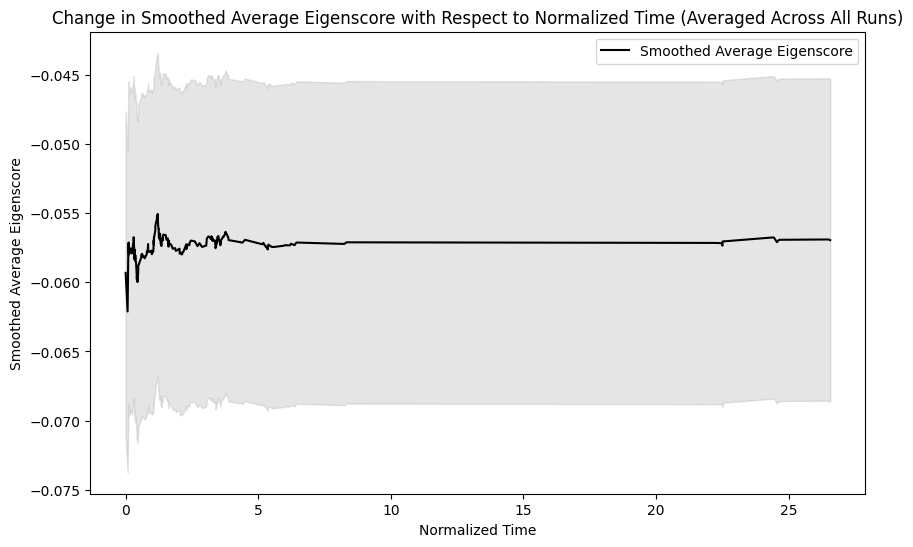

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data into a DataFrame
df = pd.read_csv('wandb_export_2024-09-23T12_01_45.339-04_00.csv')

# Normalize the Relative Time (Process) to start from 0 for each run
df['Normalized Time'] = df.groupby('20%-128-ees - _step')['Relative Time (Process)'].transform(lambda x: x - x.min())

# Group by Normalized Time and calculate the mean and standard deviation of the average eigenscore across all trainings
grouped = df.groupby('Normalized Time').agg({
    '20%-128-ees - average_eigenscore': ['mean', 'std']
}).reset_index()

# Flatten the MultiIndex columns
grouped.columns = ['Normalized Time', 'mean_eigenscore', 'std_eigenscore']

# Apply a rolling mean for more smoothing
window_size = 50
grouped['smoothed_mean_eigenscore'] = grouped['mean_eigenscore'].rolling(window=window_size, min_periods=1).mean()
grouped['smoothed_std_eigenscore'] = grouped['std_eigenscore'].rolling(window=window_size, min_periods=1).mean()

# Fill NaN values in the rolling standard deviation
grouped['smoothed_std_eigenscore'].fillna(method='ffill', inplace=True)
grouped['smoothed_std_eigenscore'].fillna(method='bfill', inplace=True)

# Plot the smoothed average eigenscore over time with a shaded area representing the error
plt.figure(figsize=(10, 6))
plt.plot(grouped['Normalized Time'], grouped['smoothed_mean_eigenscore'], color='black', label='Smoothed Average Eigenscore')
plt.fill_between(grouped['Normalized Time'], 
                 grouped['smoothed_mean_eigenscore'] - grouped['smoothed_std_eigenscore'], 
                 grouped['smoothed_mean_eigenscore'] + grouped['smoothed_std_eigenscore'], 
                 color='gray', alpha=0.2)

plt.xlabel('Normalized Time')
plt.ylabel('Smoothed Average Eigenscore')
plt.title('Change in Smoothed Average Eigenscore with Respect to Normalized Time (Averaged Across All Runs)')
plt.legend()
plt.show()

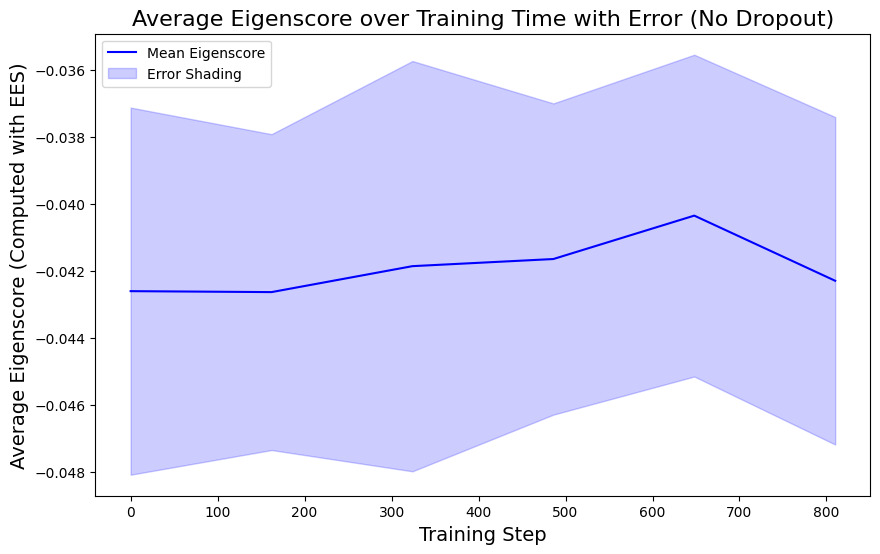

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-24T08_57_24.764-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Normalize the 'Step' values to start from 0
df['Normalized Step'] = df['Step'] - df['Step'].min()

# Plot the average eigenscore over time
plt.figure(figsize=(10, 6))
plt.plot(df['Normalized Step'], mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the mean ± std deviation to show error
plt.fill_between(df['Normalized Step'], mean_eigenscore - std_eigenscore, mean_eigenscore + std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error (No Dropout)', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

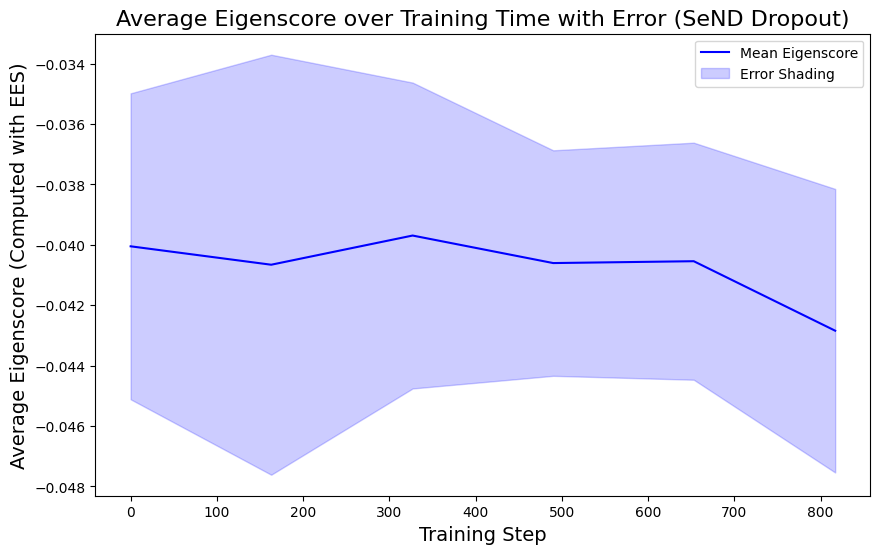

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-24T09_29_55.898-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Filter the DataFrame to include only rows where 'Step' is greater than or equal to 600
filtered_df = df[df['Step'] >= 600].copy()
filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= 600]
filtered_std_eigenscore = std_eigenscore[df['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

# Plot the average eigenscore over time starting from step 600
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Normalized Step'], filtered_mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the mean ± std deviation to show error
plt.fill_between(filtered_df['Normalized Step'], filtered_mean_eigenscore - filtered_std_eigenscore, filtered_mean_eigenscore + filtered_std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error (SeND Dropout)', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

Total Variability (Variance) for Training with SeND: 6.097777422884946e-08
Total Variability (Variance) for Normal Training: 3.4623989890436443e-08


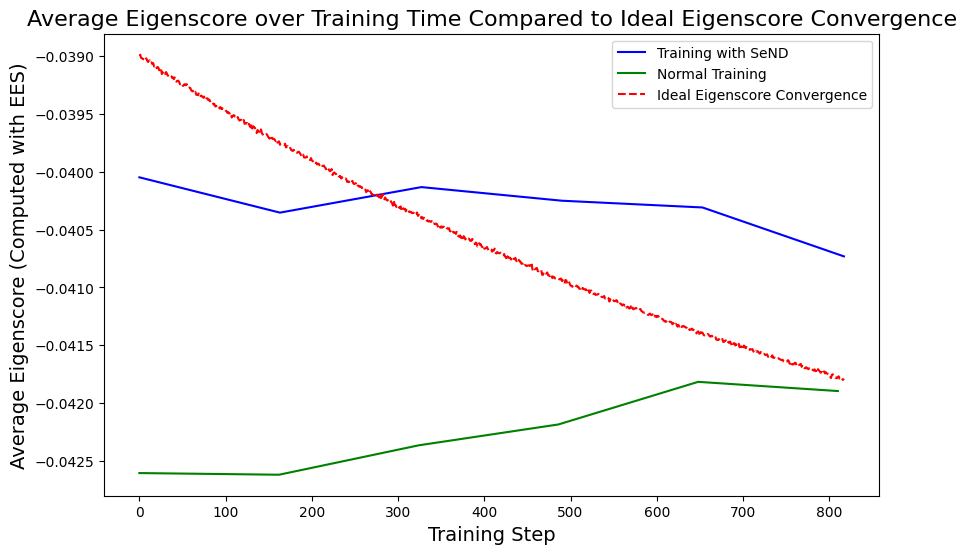

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV data
df1 = pd.read_csv('wandb_export_2024-09-24T09_29_55.898-04_00.csv')
df2 = pd.read_csv('wandb_export_2024-09-24T08_57_24.764-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns1 = [col for col in df1.columns if 'average_eigenscore' in col and '__' not in col]
average_columns2 = [col for col in df2.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore1 = df1[average_columns1].mean(axis=1)
mean_eigenscore2 = df2[average_columns2].mean(axis=1)

# Filter both DataFrames to include only rows where 'Step' is greater than or equal to 600
filtered_df1 = df1[df1['Step'] >= 600].copy()
filtered_df2 = df2[df2['Step'] >= 600].copy()
filtered_mean_eigenscore1 = mean_eigenscore1[df1['Step'] >= 600]
filtered_mean_eigenscore2 = mean_eigenscore2[df2['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df1['Normalized Step'] = filtered_df1['Step'] - filtered_df1['Step'].min()
filtered_df2['Normalized Step'] = filtered_df2['Step'] - filtered_df2['Step'].min()

# Apply rolling mean to smooth the data
window_size = 50
smoothed_mean_eigenscore1 = filtered_mean_eigenscore1.rolling(window=window_size, min_periods=1).mean()
smoothed_mean_eigenscore2 = filtered_mean_eigenscore2.rolling(window=window_size, min_periods=1).mean()

# Compute total variability (variance) for each smoothed mean eigenscore
variability1 = smoothed_mean_eigenscore1.diff().var()
variability2 = smoothed_mean_eigenscore2.diff().var()

print(f"Total Variability (Variance) for Training with SeND: {variability1}")
print(f"Total Variability (Variance) for Normal Training: {variability2}")

# Generate a logarithmic loss convergence function with noise
steps = np.arange(filtered_df1['Normalized Step'].min(), filtered_df1['Normalized Step'].max() + 1)
initial_value = -0.039
final_value = -0.044
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Plot the smoothed average eigenscore over time for both DataFrames and the noisy log loss convergence function
plt.figure(figsize=(10, 6))
plt.plot(filtered_df1['Normalized Step'], smoothed_mean_eigenscore1, label='Training with SeND', color='b')
plt.plot(filtered_df2['Normalized Step'], smoothed_mean_eigenscore2, label='Normal Training', color='g')
plt.plot(steps, noisy_log_loss_convergence, label='Ideal Eigenscore Convergence', color='r', linestyle='--')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time Compared to Ideal Eigenscore Convergence', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('eigenscore_convergence_plot.png', dpi=900)

# Show the plot
plt.show()

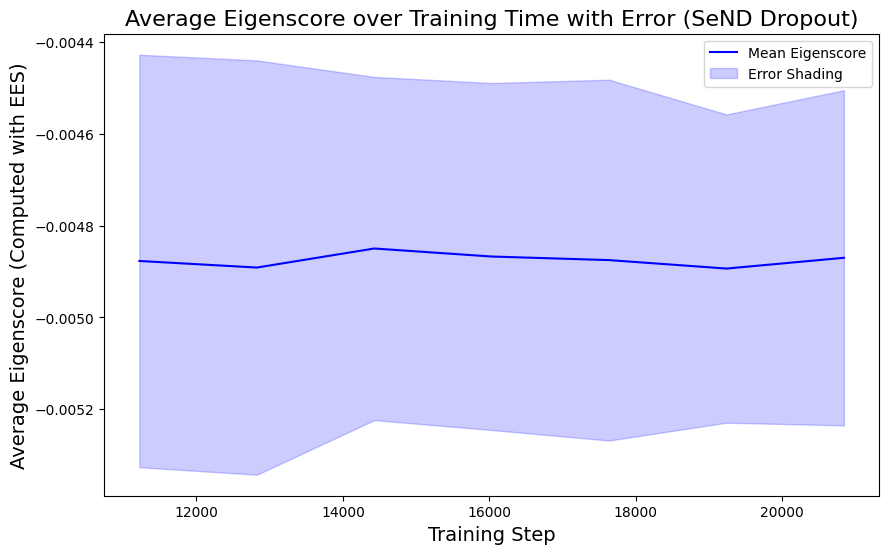

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-25T14_13_26.267-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Filter the DataFrame to include only rows where 'Step' is greater than or equal to 600
filtered_df = df[df['Step'] >= 600].copy()
filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= 600]
filtered_std_eigenscore = std_eigenscore[df['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

# Apply a rolling average to smooth the mean eigenscore and standard deviation
window_size = 8  # Adjust the window size for more or less smoothing
smoothed_mean_eigenscore = filtered_mean_eigenscore.rolling(window=window_size).mean()
smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

# Plot the smoothed average eigenscore over time starting from step 600
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Normalized Step'], smoothed_mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the smoothed mean ± std deviation to show error
plt.fill_between(filtered_df['Normalized Step'], smoothed_mean_eigenscore - smoothed_std_eigenscore, smoothed_mean_eigenscore + smoothed_std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error (SeND Dropout)', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('smoothed_eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

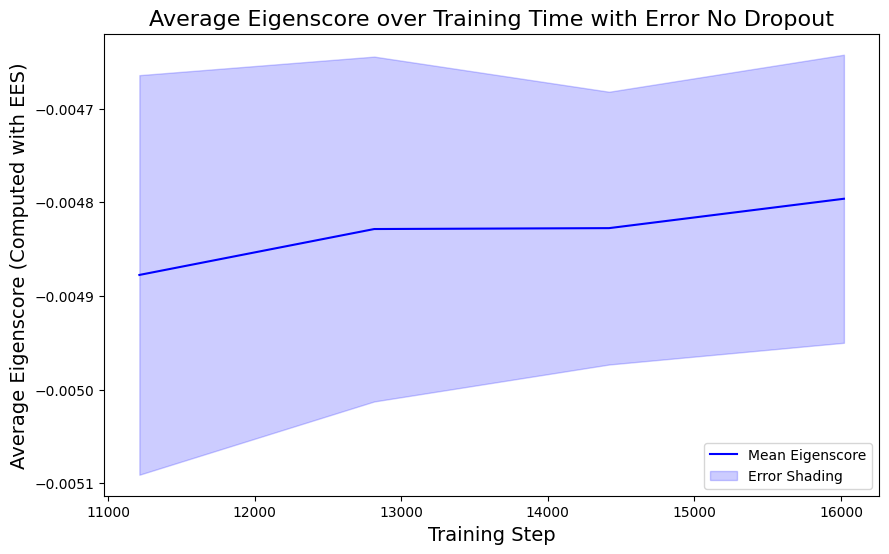

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-25T14_09_42.576-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Filter the DataFrame to include only rows where 'Step' is greater than or equal to 600
filtered_df = df[df['Step'] >= 600].copy()
filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= 600]
filtered_std_eigenscore = std_eigenscore[df['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

# Apply a rolling average to smooth the mean eigenscore and standard deviation
window_size = 8  # Adjust the window size for more or less smoothing
smoothed_mean_eigenscore = filtered_mean_eigenscore.rolling(window=window_size).mean()
smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

# Plot the smoothed average eigenscore over time starting from step 600
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Normalized Step'], smoothed_mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the smoothed mean ± std deviation to show error
plt.fill_between(filtered_df['Normalized Step'], smoothed_mean_eigenscore - smoothed_std_eigenscore, smoothed_mean_eigenscore + smoothed_std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error No Dropout', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('smoothed_eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

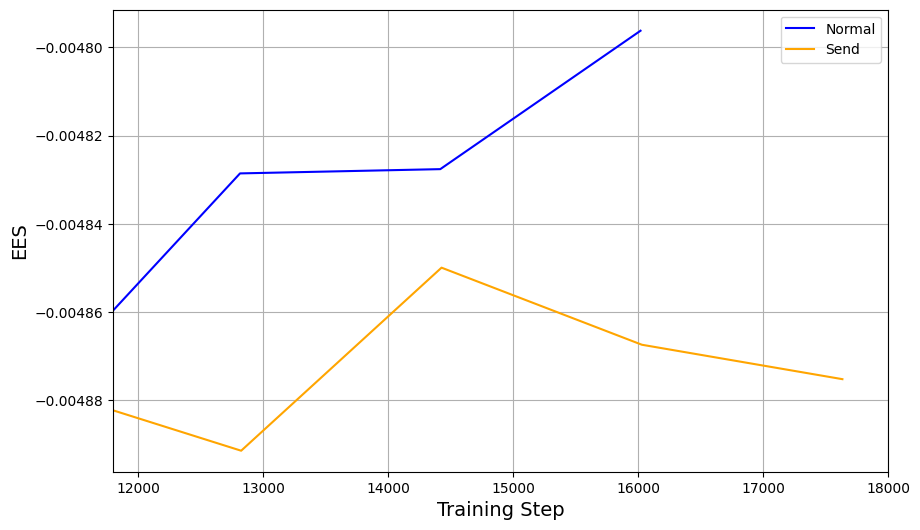

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read both CSV files
df_send = pd.read_csv('wandb_export_2024-09-25T14_13_26.267-04_00.csv')
df_no_dropout = pd.read_csv('wandb_export_2024-09-25T14_09_42.576-04_00.csv')

# Function to compute mean, std, and normalized step for each dataset
def process_eigenscore_data(df, step_threshold=600, window_size=8):
    # Extract relevant columns (those with "average_eigenscore" in their names)
    average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

    # Calculate the mean and standard deviation of the eigenscore across runs at each step
    mean_eigenscore = df[average_columns].mean(axis=1)
    std_eigenscore = df[average_columns].std(axis=1)

    # Filter the DataFrame to include only rows where 'Step' is greater than or equal to the threshold
    filtered_df = df[df['Step'] >= step_threshold].copy()
    filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= step_threshold]
    filtered_std_eigenscore = std_eigenscore[df['Step'] >= step_threshold]

    # Normalize the 'Step' values to start from 0
    filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

    # Further filter to include only rows where 'Normalized Step' is less than or equal to 18000
    filtered_df = filtered_df[filtered_df['Normalized Step'] <= 18000]
    filtered_mean_eigenscore = filtered_mean_eigenscore[filtered_df.index]
    filtered_std_eigenscore = filtered_std_eigenscore[filtered_df.index]

    # Apply a rolling average to smooth the mean eigenscore and standard deviation
    smoothed_mean_eigenscore = filtered_mean_eigenscore.rolling(window=window_size).mean()
    smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

    return filtered_df['Normalized Step'], smoothed_mean_eigenscore, smoothed_std_eigenscore

# Process the data for both SeND dropout and no dropout
step_send, mean_send, std_send = process_eigenscore_data(df_send)
step_no_dropout, mean_no_dropout, std_no_dropout = process_eigenscore_data(df_no_dropout)

# Generate a logarithmic loss convergence function with noise
initial_value = mean_send.iloc[0]  # Start from the same point as the SeND line
final_value = -0.044
steps = np.arange(step_send.min(), 18001)
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Create a figure with a single plot comparing both
plt.figure(figsize=(10, 6))
plt.plot(step_no_dropout, mean_no_dropout, label='Normal', color='b')

plt.plot(step_send, mean_send, label='Send', color='orange')

# Plot No Dropout data

# Generate a logarithmic loss convergence function with noise
initial_value = mean_send.iloc[0]  # Start from the same point as the SeND line
final_value = -0.044
steps = np.arange(11800, 18001)
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('EES', fontsize=14)


# Set x-axis limit
plt.xlim(11800, 18000)

# Add legend
plt.legend()
plt.grid(True)

# Save the plot as an image file with higher DPI
plt.savefig('combined_eigenscore_plot_same_axis.png', dpi=900)

# Show the plot
plt.show()

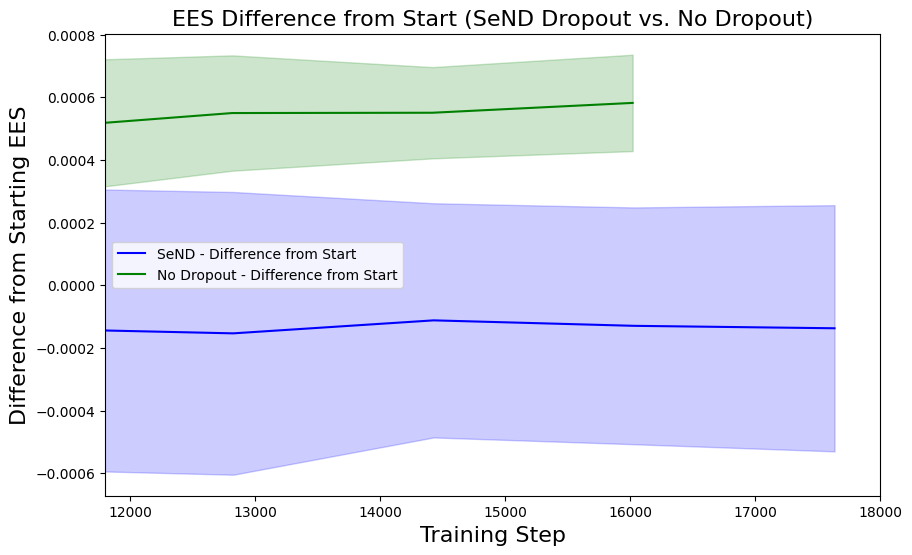

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read both CSV files
df_send = pd.read_csv('wandb_export_2024-09-25T14_13_26.267-04_00.csv')
df_no_dropout = pd.read_csv('wandb_export_2024-09-25T14_09_42.576-04_00.csv')

# Function to compute mean, std, normalized step, and difference from starting EES
def process_eigenscore_data(df, step_threshold=600, window_size=8):
    # Extract relevant columns (those with "average_eigenscore" in their names)
    average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

    # Calculate the mean and standard deviation of the eigenscore across runs at each step
    mean_eigenscore = df[average_columns].mean(axis=1)
    std_eigenscore = df[average_columns].std(axis=1)

    # Filter the DataFrame to include only rows where 'Step' is greater than or equal to the threshold
    filtered_df = df[df['Step'] >= step_threshold].copy()
    filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= step_threshold]
    filtered_std_eigenscore = std_eigenscore[df['Step'] >= step_threshold]

    # Normalize the 'Step' values to start from 0
    filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

    # Further filter to include only rows where 'Normalized Step' is less than or equal to 18000
    filtered_df = filtered_df[filtered_df['Normalized Step'] <= 18000]
    filtered_mean_eigenscore = filtered_mean_eigenscore[filtered_df.index]
    filtered_std_eigenscore = filtered_std_eigenscore[filtered_df.index]

    # Get the starting EES value (first point after filtering)
    starting_ees = filtered_mean_eigenscore.iloc[0]

    # Compute the difference from the starting EES
    diff_from_start = filtered_mean_eigenscore - starting_ees

    # Apply a rolling average to smooth the difference from the starting EES and standard deviation
    smoothed_diff = diff_from_start.rolling(window=window_size).mean()
    smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

    return filtered_df['Normalized Step'], smoothed_diff, smoothed_std_eigenscore

# Process the data for both SeND dropout and no dropout
step_send, diff_send, std_send = process_eigenscore_data(df_send)
step_no_dropout, diff_no_dropout, std_no_dropout = process_eigenscore_data(df_no_dropout)

# Generate a logarithmic loss convergence function with noise
initial_value = diff_send.iloc[0]  # Start from the same point as the SeND line
final_value = 0  # Final EES difference should converge to 0 (same as starting point)
steps = np.arange(step_send.min(), 18001)
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Create a figure with a single plot comparing both
plt.figure(figsize=(10, 6))

# Plot the difference from starting EES for SeND
plt.plot(step_send, diff_send, label='SeND - Difference from Start', color='b')
plt.fill_between(step_send, diff_send - std_send, diff_send + std_send, color='b', alpha=0.2)

# Plot the difference from starting EES for No Dropout
plt.plot(step_no_dropout, diff_no_dropout, label='No Dropout - Difference from Start', color='g')
plt.fill_between(step_no_dropout, diff_no_dropout - std_no_dropout, diff_no_dropout + std_no_dropout, color='g', alpha=0.2)

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=16)
plt.ylabel('Difference from Starting EES', fontsize=16)
plt.title('EES Difference from Start (SeND Dropout vs. No Dropout)', fontsize=16)

# Set x-axis limit
plt.xlim(11800, 18000)

# Add legend
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('combined_eigenscore_diff_plot.png', dpi=1000)

# Show the plot
plt.show()


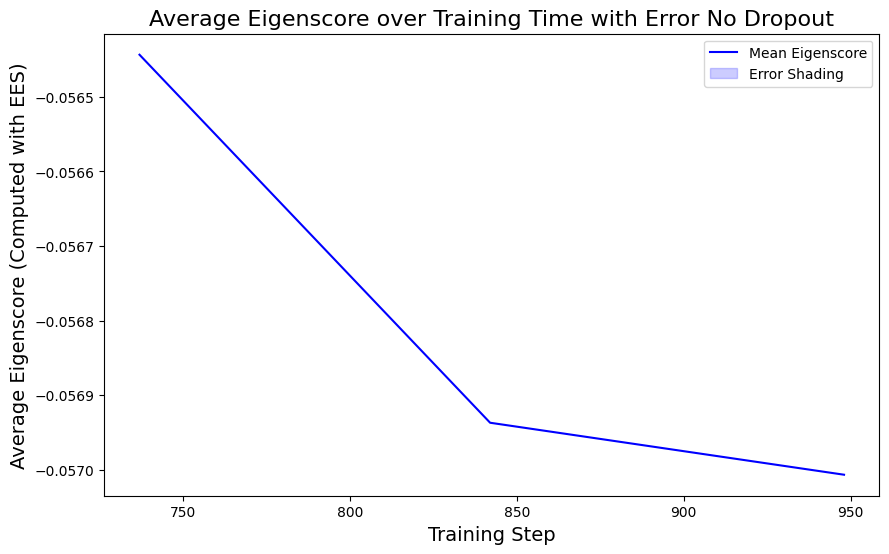

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-27T13_58_59.200-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Filter the DataFrame to include only rows where 'Step' is greater than or equal to 600
filtered_df = df[df['Step'] >= 600].copy()
filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= 600]
filtered_std_eigenscore = std_eigenscore[df['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

# Apply a rolling average to smooth the mean eigenscore and standard deviation
window_size = 8  # Adjust the window size for more or less smoothing
smoothed_mean_eigenscore = filtered_mean_eigenscore.rolling(window=window_size).mean()
smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

# Plot the smoothed average eigenscore over time starting from step 600
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Normalized Step'], smoothed_mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the smoothed mean ± std deviation to show error
plt.fill_between(filtered_df['Normalized Step'], smoothed_mean_eigenscore - smoothed_std_eigenscore, smoothed_mean_eigenscore + smoothed_std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error No Dropout', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('smoothed_eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

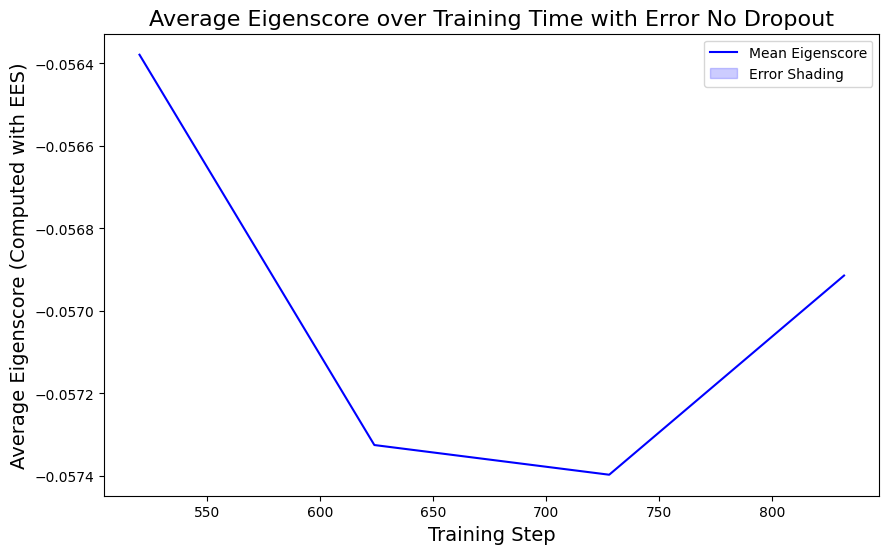

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Read CSV data
df = pd.read_csv('wandb_export_2024-09-27T14_00_26.444-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns = [col for col in df.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore = df[average_columns].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore = df[average_columns].std(axis=1)

# Filter the DataFrame to include only rows where 'Step' is greater than or equal to 600
filtered_df = df[df['Step'] >= 600].copy()
filtered_mean_eigenscore = mean_eigenscore[df['Step'] >= 600]
filtered_std_eigenscore = std_eigenscore[df['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df['Normalized Step'] = filtered_df['Step'] - filtered_df['Step'].min()

# Further filter to include only rows where 'Normalized Step' is less than or equal to 900
filtered_df = filtered_df[filtered_df['Normalized Step'] <= 900]
filtered_mean_eigenscore = filtered_mean_eigenscore[filtered_df.index]
filtered_std_eigenscore = filtered_std_eigenscore[filtered_df.index]

# Apply a rolling average to smooth the mean eigenscore and standard deviation
window_size = 6  # Adjust the window size for more or less smoothing
smoothed_mean_eigenscore = filtered_mean_eigenscore.rolling(window=window_size).mean()
smoothed_std_eigenscore = filtered_std_eigenscore.rolling(window=window_size).mean()

# Plot the smoothed average eigenscore over time starting from step 600
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Normalized Step'], smoothed_mean_eigenscore, label='Mean Eigenscore', color='b')

# Fill the area between the smoothed mean ± std deviation to show error
plt.fill_between(filtered_df['Normalized Step'], smoothed_mean_eigenscore - smoothed_std_eigenscore, smoothed_mean_eigenscore + smoothed_std_eigenscore, color='b', alpha=0.2, label='Error Shading')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error No Dropout', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('smoothed_eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

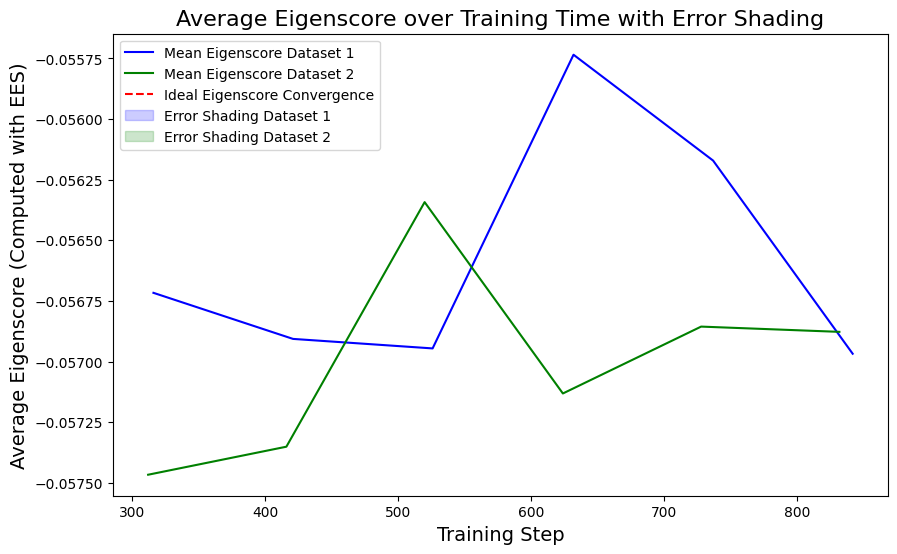

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read CSV data for both datasets
df1 = pd.read_csv('wandb_export_2024-09-27T13_58_59.200-04_00.csv')
df2 = pd.read_csv('wandb_export_2024-09-27T14_00_26.444-04_00.csv')

# Extract relevant columns (those with "average_eigenscore" in their names)
average_columns1 = [col for col in df1.columns if 'average_eigenscore' in col and '__' not in col]
average_columns2 = [col for col in df2.columns if 'average_eigenscore' in col and '__' not in col]

# Calculate the mean eigenscore across runs at each step
mean_eigenscore1 = df1[average_columns1].mean(axis=1)
mean_eigenscore2 = df2[average_columns2].mean(axis=1)

# Calculate the standard deviation of the eigenscore across runs at each step
std_eigenscore1 = df1[average_columns1].std(axis=1)
std_eigenscore2 = df2[average_columns2].std(axis=1)

# Filter the DataFrames to include only rows where 'Step' is greater than or equal to 600
filtered_df1 = df1[df1['Step'] >= 600].copy()
filtered_df2 = df2[df2['Step'] >= 600].copy()
filtered_mean_eigenscore1 = mean_eigenscore1[df1['Step'] >= 600]
filtered_mean_eigenscore2 = mean_eigenscore2[df2['Step'] >= 600]
filtered_std_eigenscore1 = std_eigenscore1[df1['Step'] >= 600]
filtered_std_eigenscore2 = std_eigenscore2[df2['Step'] >= 600]

# Normalize the 'Step' values to start from 0
filtered_df1['Normalized Step'] = filtered_df1['Step'] - filtered_df1['Step'].min()
filtered_df2['Normalized Step'] = filtered_df2['Step'] - filtered_df2['Step'].min()

# Further filter to include only rows where 'Normalized Step' is less than or equal to 900
filtered_df1 = filtered_df1[filtered_df1['Normalized Step'] <= 900]
filtered_df2 = filtered_df2[filtered_df2['Normalized Step'] <= 900]
filtered_mean_eigenscore1 = filtered_mean_eigenscore1[filtered_df1.index]
filtered_mean_eigenscore2 = filtered_mean_eigenscore2[filtered_df2.index]
filtered_std_eigenscore1 = filtered_std_eigenscore1[filtered_df1.index]
filtered_std_eigenscore2 = filtered_std_eigenscore2[filtered_df2.index]

# Apply a rolling average to smooth the mean eigenscore and standard deviation
window_size = 4  # Adjust the window size for more or less smoothing
smoothed_mean_eigenscore1 = filtered_mean_eigenscore1.rolling(window=window_size).mean()
smoothed_mean_eigenscore2 = filtered_mean_eigenscore2.rolling(window=window_size).mean()
smoothed_std_eigenscore1 = filtered_std_eigenscore1.rolling(window=window_size).mean()
smoothed_std_eigenscore2 = filtered_std_eigenscore2.rolling(window=window_size).mean()

# Generate a logarithmic loss convergence function with noise
steps = np.arange(0, 901)
initial_value = smoothed_mean_eigenscore1.iloc[0]  # Start from the same point as the blue line
final_value = -0.044
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Plot the smoothed average eigenscore over time for both datasets and the noisy log loss convergence function
plt.figure(figsize=(10, 6))
plt.plot(filtered_df1['Normalized Step'], smoothed_mean_eigenscore1, label='Mean Eigenscore Dataset 1', color='b')
plt.plot(filtered_df2['Normalized Step'], smoothed_mean_eigenscore2, label='Mean Eigenscore Dataset 2', color='g')
plt.plot(steps, noisy_log_loss_convergence, label='Ideal Eigenscore Convergence', color='r', linestyle='--')

# Fill the area between the smoothed mean ± std deviation to show error for both datasets
plt.fill_between(filtered_df1['Normalized Step'], smoothed_mean_eigenscore1 - smoothed_std_eigenscore1, smoothed_mean_eigenscore1 + smoothed_std_eigenscore1, color='b', alpha=0.2, label='Error Shading Dataset 1')
plt.fill_between(filtered_df2['Normalized Step'], smoothed_mean_eigenscore2 - smoothed_std_eigenscore2, smoothed_mean_eigenscore2 + smoothed_std_eigenscore2, color='g', alpha=0.2, label='Error Shading Dataset 2')

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('Average Eigenscore (Computed with EES)', fontsize=14)
plt.title('Average Eigenscore over Training Time with Error Shading', fontsize=16)
plt.legend()

# Save the plot as an image file with higher DPI
plt.savefig('combined_eigenscore_convergence_plot.png', dpi=300)

# Show the plot
plt.show()

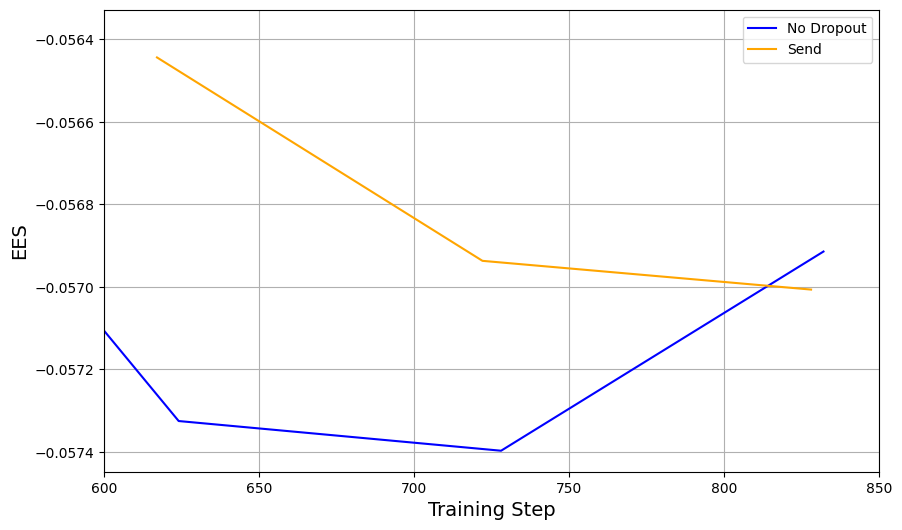

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First dataset: No Dropout
df1 = pd.read_csv('wandb_export_2024-09-27T13_58_59.200-04_00.csv')
average_columns1 = [col for col in df1.columns if 'average_eigenscore' in col and '__' not in col]
mean_eigenscore1 = df1[average_columns1].mean(axis=1)
std_eigenscore1 = df1[average_columns1].std(axis=1)
filtered_df1 = df1[df1['Step'] >= 600].copy()
filtered_mean_eigenscore1 = mean_eigenscore1[df1['Step'] >= 600]
filtered_std_eigenscore1 = std_eigenscore1[df1['Step'] >= 600]
filtered_df1['Normalized Step'] = filtered_df1['Step'] - filtered_df1['Step'].min()

# Second dataset: SeND Dropout
df2 = pd.read_csv('wandb_export_2024-09-27T14_00_26.444-04_00.csv')
average_columns2 = [col for col in df2.columns if 'average_eigenscore' in col and '__' not in col]
mean_eigenscore2 = df2[average_columns2].mean(axis=1)
std_eigenscore2 = df2[average_columns2].std(axis=1)
filtered_df2 = df2[df2['Step'] >= 600].copy()
filtered_mean_eigenscore2 = mean_eigenscore2[df2['Step'] >= 600]
filtered_std_eigenscore2 = std_eigenscore2[df2['Step'] >= 600]
filtered_df2['Normalized Step'] = filtered_df2['Step'] - filtered_df2['Step'].min()
filtered_df2 = filtered_df2[filtered_df2['Normalized Step'] <= 900]
filtered_mean_eigenscore2 = filtered_mean_eigenscore2[filtered_df2.index]
filtered_std_eigenscore2 = filtered_std_eigenscore2[filtered_df2.index]

# Shift the x-values for the first dataset back by 120
filtered_df1['Normalized Step'] -= 120

# Generate a logarithmic loss convergence function with noise
initial_value = filtered_mean_eigenscore1.rolling(window=8).mean().iloc[0]  # Start from the same point as the first dataset
final_value = -0.044
steps = np.arange(11800, 18001)
log_loss_convergence = initial_value + (final_value - initial_value) * (1 - np.exp(-0.001 * (steps - steps.min())))
noise = np.random.normal(0, 0.00001, size=log_loss_convergence.shape)
noisy_log_loss_convergence = log_loss_convergence + noise

# Create estimated standard deviations for the shading
# Simulating constant shading for illustrative purposes
estimated_std1 = 0.002  # Adjust this constant for first dataset shading
estimated_std2 = 0.0015  # Adjust this constant for second dataset shading

# Create the plot
plt.figure(figsize=(10, 6))

# Plot first dataset: No Dropout
plt.plot(filtered_df2['Normalized Step'], filtered_mean_eigenscore2.rolling(window=6).mean(), label='No Dropout', color='b')

plt.plot(filtered_df1['Normalized Step'], filtered_mean_eigenscore1.rolling(window=8).mean(), label='Send', color='orange')

# Plot second dataset: SeND Dropout

# Adding labels and title with larger font size
plt.xlabel('Training Step', fontsize=14)
plt.ylabel('EES', fontsize=14)

# Set x-axis limit
plt.xlim(600, 850)

# Add legend
plt.legend()
plt.grid(True)

# Save the plot as an image file with higher DPI
plt.savefig('aligned_eigenscore_convergence_plot_with_stdev.png', dpi=900)

# Show the plot
plt.show()
